# Day 14: Restroom Redoubt

### Part 1
One of The Historians needs to use the bathroom; fortunately, you know there's a bathroom near an unvisited location on their list, and so you're all quickly teleported directly to the lobby of Easter Bunny Headquarters.

Unfortunately, EBHQ seems to have "improved" bathroom security again after your last visit. The area outside the bathroom is swarming with robots!

To get The Historian safely to the bathroom, you'll need a way to predict where the robots will be in the future. Fortunately, they all seem to be moving on the tile floor in predictable straight lines.

You make a list (your puzzle input) of all of the robots' current positions (p) and velocities (v), one robot per line. For example:

```
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3
```

Each robot's position is given as p=x,y where x represents the number of tiles the robot is from the left wall and y represents the number of tiles from the top wall (when viewed from above). So, a position of p=0,0 means the robot is all the way in the top-left corner.

Each robot's velocity is given as v=x,y where x and y are given in tiles per second. Positive x means the robot is moving to the right, and positive y means the robot is moving down. So, a velocity of v=1,-2 means that each second, the robot moves 1 tile to the right and 2 tiles up.

The robots outside the actual bathroom are in a space which is 101 tiles wide and 103 tiles tall (when viewed from above). However, in this example, the robots are in a space which is only 11 tiles wide and 7 tiles tall.

The robots are good at navigating over/under each other (due to a combination of springs, extendable legs, and quadcopters), so they can share the same tile and don't interact with each other. Visually, the number of robots on each tile in this example looks like this:

```
1.12.......
...........
...........
......11.11
1.1........
.........1.
.......1...
```

These robots have a unique feature for maximum bathroom security: they can teleport. When a robot would run into an edge of the space they're in, they instead teleport to the other side, effectively wrapping around the edges. Here is what robot p=2,4 v=2,-3 does for the first few seconds:

Initial state:
```
...........
...........
...........
...........
..1........
...........
...........
```

After 1 second:
```
...........
....1......
...........
...........
...........
...........
...........
```

After 2 seconds:
```
...........
...........
...........
...........
...........
......1....
...........
```

After 3 seconds:
```
...........
...........
........1..
...........
...........
...........
...........
```

After 4 seconds:
```
...........
...........
...........
...........
...........
...........
..........1
```

After 5 seconds:
```
...........
...........
...........
.1.........
...........
...........
...........
```

The Historian can't wait much longer, so you don't have to simulate the robots for very long. Where will the robots be after 100 seconds?

In the above example, the number of robots on each tile after 100 seconds has elapsed looks like this:

```
......2..1.
...........
1..........
.11........
.....1.....
...12......
.1....1....
```

To determine the safest area, count the number of robots in each quadrant after 100 seconds. Robots that are exactly in the middle (horizontally or vertically) don't count as being in any quadrant, so the only relevant robots are:

```
..... 2..1.
..... .....
1.... .....

..... .....
...12 .....
.1... 1....
```

In this example, the quadrants contain 1, 3, 4, and 1 robot. Multiplying these together gives a total safety factor of 12.

Predict the motion of the robots in your list within a space which is 101 tiles wide and 103 tiles tall. What will the safety factor be after exactly 100 seconds have elapsed?




In [1]:
import com.psyndicate.aoc.*
import kotlin.test.assertEquals

val testInput =
    """
    p=0,4 v=3,-3
    p=6,3 v=-1,-3
    p=10,3 v=-1,2
    p=2,0 v=2,-1
    p=0,0 v=1,3
    p=3,0 v=-2,-2
    p=7,6 v=-1,-3
    p=3,0 v=-1,-2
    p=9,3 v=2,3
    p=7,3 v=-1,2
    p=2,4 v=2,-3
    p=9,5 v=-3,-3
    """.trimIndent()

data class Robot(val position: Coord, val velocity: Coord) {
    fun tick(seconds: Int, width: Int, height: Int): Coord {
        val x = (position.x + velocity.x * seconds) % width
        val y = (position.y + velocity.y * seconds) % height
        return Coord(if (x < 0) x + width else x, if (y < 0) y + height else y)
    }

    companion object {
        fun parseRobot(line: String): Robot {
            val parts = line.split(' ')
            val (position, velocity) = parts.map {
                it.split('=').last().split(',').let { (x, y) -> Coord(x.toInt(), y.toInt()) }
            }
            return Robot(position, velocity)
        }
    }
}

fun makeQuadrants(width: Int, height: Int): List<Pair<IntRange, IntRange>> {
    val q1XStart = 0
    val q1XEnd = width / 2
    val q2XStart = q1XEnd + 1
    val q1YStart = 0
    val q1YEnd = height / 2
    val q3YStart = q1YEnd + 1
    val q3YEnd = height
    return listOf(
        (q1XStart until q1XEnd) to (q1YStart until q1YEnd),
        (q2XStart until width) to (q1YStart until q1YEnd),
        (q1XStart until q1XEnd) to (q3YStart until q3YEnd),
        (q2XStart until width) to (q3YStart until q3YEnd)
    )
}

fun calculatePart1(input: String, width: Int, height: Int): Int {
    val robots = input.split('\n').map(Robot::parseRobot)
    val positions = robots.map { it.tick(100, width, height) }
    return makeQuadrants(width, height).fold(1) { acc, quad -> acc * positions.count { it.x in quad.first && it.y in quad.second } }
}

val testInputPart1Result = calculatePart1(testInput, 11, 7)
DISPLAY("Test Part 1: ${testInputPart1Result}")
assertEquals(12, testInputPart1Result)

val puzzleInput = readResourceAsText("/day14/input.txt")
val part1Result = calculatePart1(puzzleInput, 101, 103)
DISPLAY("Part 1: ${part1Result}")
assertEquals(230900224, part1Result)

Test Part 1: 12

Part 1: 230900224


### Part 2
During the bathroom break, someone notices that these robots seem awfully similar to ones built and used at the North Pole. If they're the same type of robots, they should have a hard-coded Easter egg: very rarely, most of the robots should arrange themselves into a picture of a Christmas tree.

What is the fewest number of seconds that must elapse for the robots to display the Easter egg?

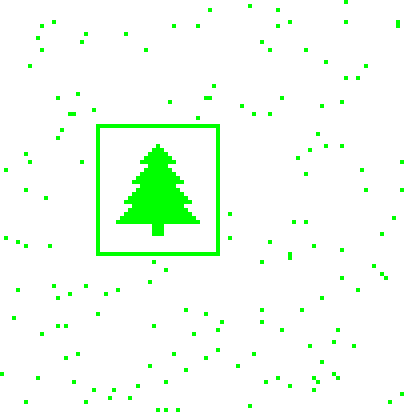

Part 2: 6532

In [2]:
import java.awt.Color

fun countLines(positions: List<Coord>, minLineLength: Int, height: Int): Int {
    return (0 until height).count { y ->
        val xPoints = positions.filter { it.y == y }.sortedBy { it.x }
        if (xPoints.size < minLineLength) return@count false
        xPoints.windowed(minLineLength) { window ->
            val startX = window.first().x
            window.allIndexed { index, pos -> pos.x - startX == index }
        }.any { it }
    }
}

fun calculatePart2(input: String, width: Int, height: Int): Int {
    val robots = input.split('\n').map(Robot::parseRobot)
    return (0..Integer.MAX_VALUE).first { tick ->
        val positions = robots.map { it.tick(tick, width, height) }
        if (countLines(positions, 7, height) > 10) {
            // Winner
            val scale = 4
            DISPLAY(canvas(width * scale, height * scale) { w, h ->
                background = Color.WHITE
                color = Color.GREEN
                clearRect(0, 0, w, h)
                positions.forEach {
                    fillRect(it.x * scale, it.y * scale, scale, scale)
                }
            })
            true
        } else
            false
    }
}

val part2Result = calculatePart2(puzzleInput, 101, 103)
DISPLAY("Part 2: ${part2Result}")
assertEquals(6532, part2Result)